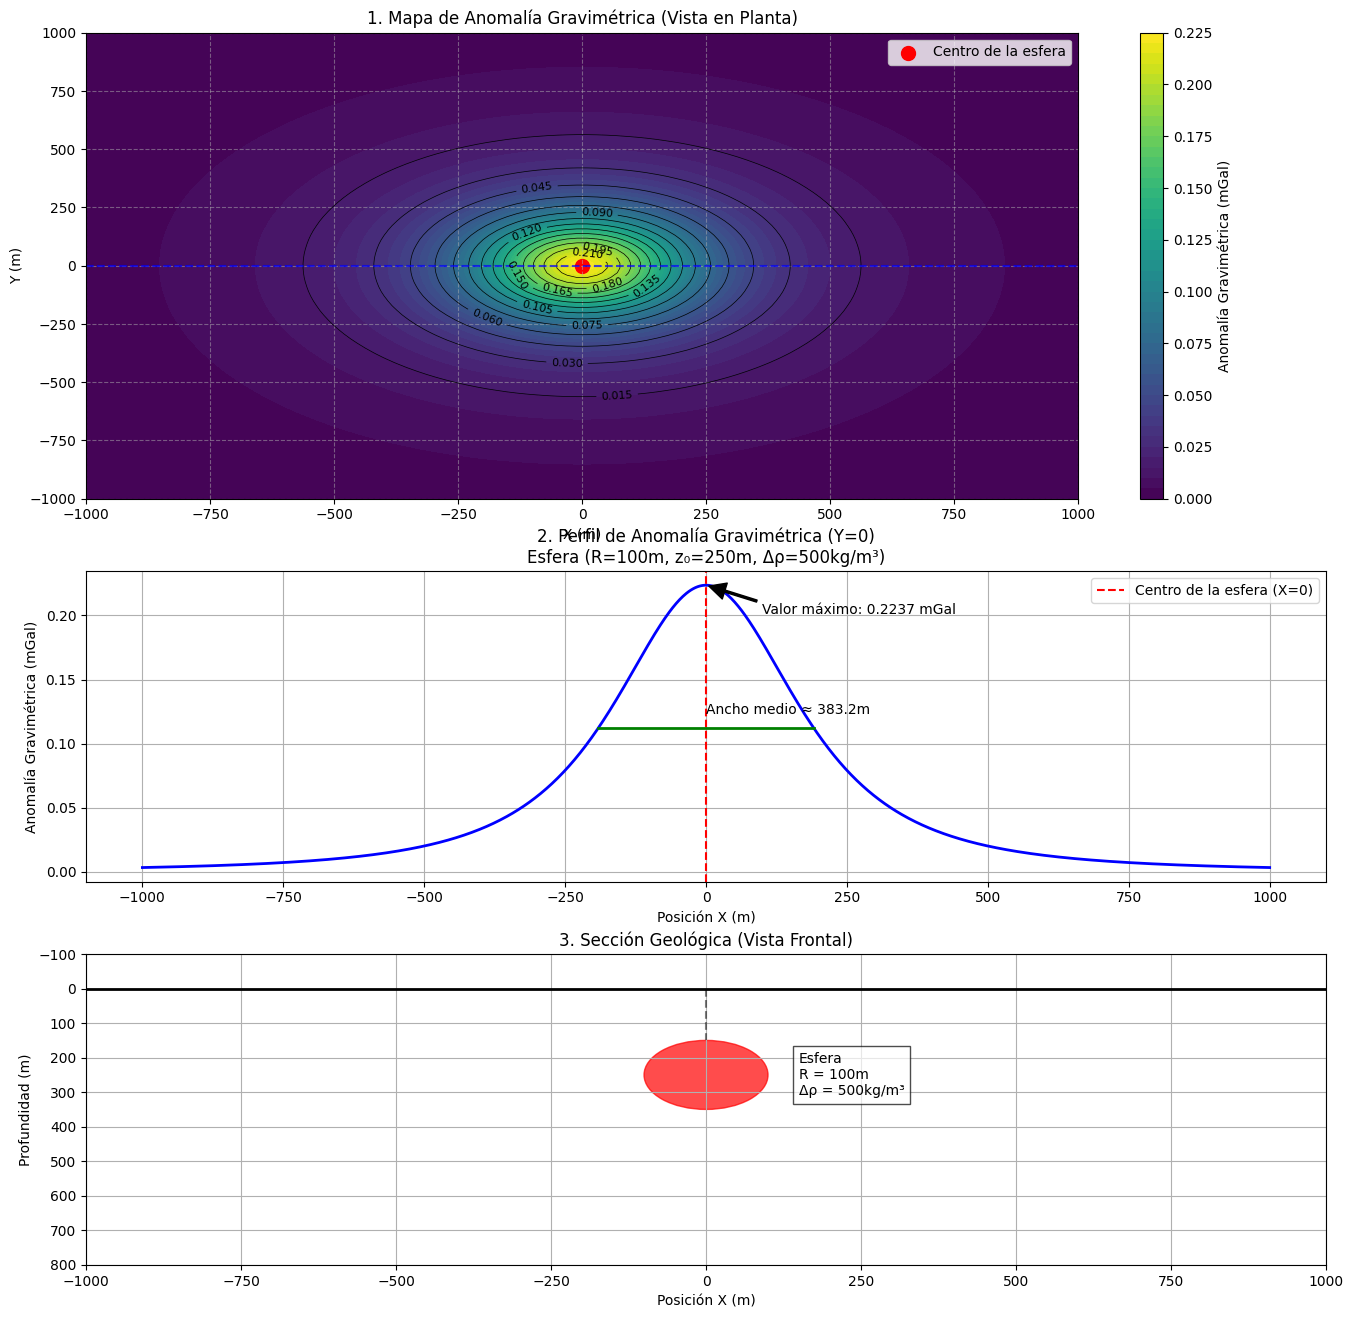

Parámetros de la esfera:
- Radio: 100 m
- Profundidad hasta el centro: 250 m
- Contraste de densidad: 500 kg/m³

Resultados del modelo:
- Valor máximo de anomalía: 0.223653 mGal
- Ancho medio de la anomalía: 383.22 m
- Relación profundidad/ancho medio: 0.6524 (teórico: 0.652)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import G

# Parámetros de la esfera
x0 = 0           # Posición X del centro de la esfera (m)
y0 = 0           # Posición Y del centro de la esfera (m)
z0 = 250         # Profundidad del centro de la esfera (m)
rho = 500        # Contraste de densidad (kg/m³)
R = 100          # Radio de la esfera (m)

# Función para calcular la anomalía gravimétrica de una esfera
def esfera_anomalia(x, y, z0, rho, R):

    # Cálculo de la anomalía utilizando la fórmula analítica para una esfera
    factor = (4/3) * np.pi * G * rho * R**3
    # Distancia desde el punto de observación al centro de la esfera
    r = np.sqrt((x - x0)**2 + (y - y0)**2 + z0**2)
    # Componente vertical de la aceleración gravitacional
    g_z = factor * z0 / r**3
    # Convertir a mGal (1 mGal = 10⁻⁵ m/s²)
    return g_z * 1e5

# Crear perfil horizontal para visualizar la anomalía
x_profile = np.linspace(-1000, 1000, 1000)  # Posiciones horizontales (m)
g_profile = esfera_anomalia(x_profile, np.zeros_like(x_profile), z0, rho, R)

# Crear malla para vista en planta (mapa)
gridsize = 100
x_grid = np.linspace(-1000, 1000, gridsize)
y_grid = np.linspace(-1000, 1000, gridsize)
X, Y = np.meshgrid(x_grid, y_grid)

# Calcular la anomalía gravimétrica en toda la malla
g_map = esfera_anomalia(X, Y, z0, rho, R)

# Crear una figura con tres subplots: vista en planta, perfil y sección geológica
fig = plt.figure(figsize=(16, 16))
gs = fig.add_gridspec(3, 1, height_ratios=[1.5, 1, 1])

# 1. Graficar el mapa de la anomalía gravitacional (vista en planta)
ax1 = fig.add_subplot(gs[0])
contourf = ax1.contourf(X, Y, g_map, levels=50, cmap='viridis')
plt.colorbar(contourf, ax=ax1, label='Anomalía Gravimétrica (mGal)')
# Marcar la posición de la esfera
ax1.scatter(x0, y0, color='red', marker='o', s=100, label='Centro de la esfera')
# Añadir contornos
contour = ax1.contour(X, Y, g_map, levels=15, colors='black', linewidths=0.5)
ax1.clabel(contour, inline=True, fontsize=8, colors='black')
ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')
ax1.set_title('1. Mapa de Anomalía Gravimétrica (Vista en Planta)')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.5)
# Mostrar la línea donde se tomó el perfil
ax1.axhline(y=y0, color='blue', linestyle='--', alpha=0.7, label='Línea de perfil')


# 2. Graficar el perfil de anomalía
ax2 = fig.add_subplot(gs[1])
ax2.plot(x_profile, g_profile, 'b-', linewidth=2)
ax2.axvline(x=x0, color='r', linestyle='--', label=f'Centro de la esfera (X={x0})')
ax2.set_xlabel('Posición X (m)')
ax2.set_ylabel('Anomalía Gravimétrica (mGal)')
ax2.set_title(f'2. Perfil de Anomalía Gravimétrica (Y=0)\nEsfera (R={R}m, z₀={z0}m, Δρ={rho}kg/m³)')
ax2.grid(True)
ax2.legend()
# Calcular y mostrar valores importantes
max_value = np.max(g_profile)
ax2.annotate(f'Valor máximo: {max_value:.4f} mGal',
             xy=(x0, max_value), xytext=(x0+100, max_value*0.9),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
# Añadir líneas que muestran el ancho medio de la anomalía
half_max = max_value / 2
x_half_left = np.interp(half_max, g_profile[x_profile < x0], x_profile[x_profile < x0])
x_half_right = np.interp(half_max, np.flip(g_profile[x_profile > x0]), np.flip(x_profile[x_profile > x0]))
width = x_half_right - x_half_left
ax2.plot([x_half_left, x_half_right], [half_max, half_max], 'g-', linewidth=2)
ax2.text((x_half_left + x_half_right)/2, half_max*1.1, f'Ancho medio ≈ {width:.1f}m')


# 3. Graficar la sección geológica
ax3 = fig.add_subplot(gs[2])
ax3.set_ylim(800, -100)  # Invertir eje Y para representar profundidad
ax3.set_xlim(np.min(x_profile), np.max(x_profile))
ax3.set_xlabel('Posición X (m)')
ax3.set_ylabel('Profundidad (m)')
ax3.set_title('3. Sección Geológica (Vista Frontal)')
ax3.grid(True)
# Dibujar la superficie
ax3.axhline(y=0, color='black', linestyle='-', linewidth=2, label='Superficie')
# Dibujar la esfera
circle = plt.Circle((x0, z0), R, fill=True, color='r', alpha=0.7, label='Esfera')
ax3.add_patch(circle)
# Añadir línea punteada desde la superficie hasta la esfera
ax3.plot([x0, x0], [0, z0-R], 'k--', alpha=0.5)
plt.show()


# Calcular y mostrar valores clave en la consola
print(f"Parámetros de la esfera:")
print(f"- Radio: {R} m")
print(f"- Profundidad hasta el centro: {z0} m")
print(f"- Contraste de densidad: {rho} kg/m³")
print(f"\nResultados del modelo:")
print(f"- Valor máximo de anomalía: {max_value:.6f} mGal")
print(f"- Ancho medio de la anomalía: {width:.2f} m")
print(f"- Relación profundidad/ancho medio: {z0/width:.4f} (teórico: 0.652)")

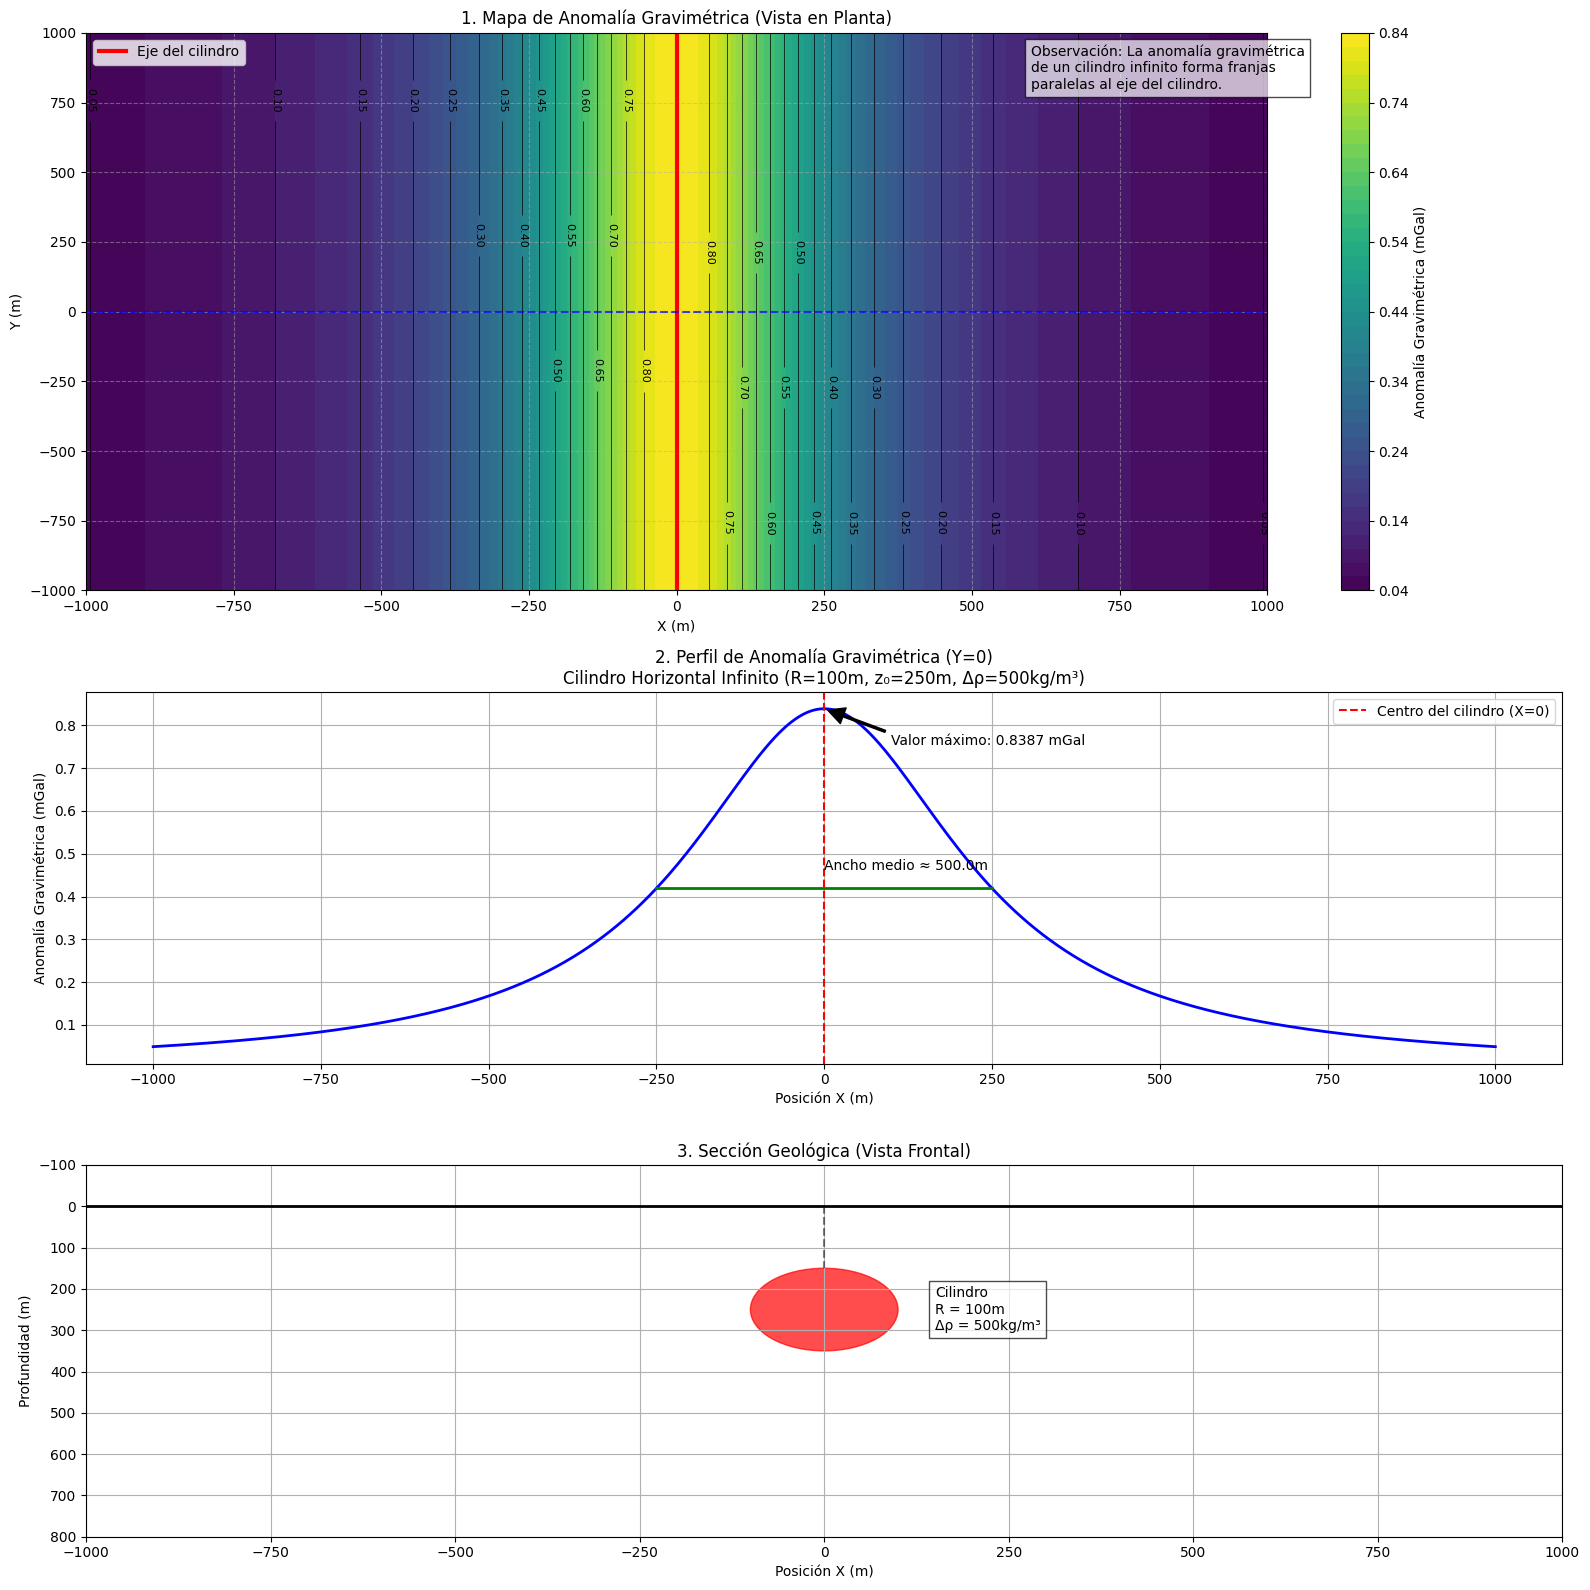

Parámetros del cilindro:
- Radio: 100 m
- Profundidad hasta el centro: 250 m
- Contraste de densidad: 500 kg/m³

Resultados del modelo:
- Valor máximo de anomalía: 0.838704 mGal
- Ancho medio de la anomalía: 500.01 m
- Relación profundidad/ancho medio: 0.5000 (teórico: 0.5)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import G

# Parámetros del cilindro horizontal infinito (puedes modificar estos valores)
x0 = 0           # Posición X del centro del cilindro (m)
y0 = 0           # Posición Y del centro del cilindro (eje del cilindro) (m)
z0 = 250         # Profundidad del centro del cilindro (m)
rho = 500        # Contraste de densidad (kg/m³)
R = 100          # Radio del cilindro (m)

# Función para calcular la anomalía gravimétrica de un cilindro horizontal infinito
def cilindro_infinito_anomalia(x, z0, rho, R):

    # Cálculo de la anomalía utilizando la fórmula analítica
    factor = 2 * np.pi * G * rho * R**2
    g_z = factor * z0 / (x**2 + z0**2)

    # Convertir a mGal (1 mGal = 10⁻⁵ m/s²)
    return g_z * 1e5

# Crear perfil horizontal para visualizar la anomalía
x_profile = np.linspace(-1000, 1000, 1000)  # Posiciones horizontales (m)
g_profile = cilindro_infinito_anomalia(x_profile - x0, z0, rho, R)

# Crear malla para vista en planta (mapa)
gridsize = 100
x_grid = np.linspace(-1000, 1000, gridsize)
y_grid = np.linspace(-1000, 1000, gridsize)
X, Y = np.meshgrid(x_grid, y_grid)

# Calcular la distancia perpendicular al eje del cilindro (que está a lo largo del eje Y)
# Para un cilindro a lo largo del eje Y, solo la distancia en X importa
dist_perpendicular = np.abs(X - x0)

# Calcular la anomalía gravimétrica en toda la malla
g_map = cilindro_infinito_anomalia(dist_perpendicular, z0, rho, R)

# Crear una figura con tres subplots: vista en planta, perfil y sección geológica
fig = plt.figure(figsize=(16, 16))
gs = fig.add_gridspec(3, 1, height_ratios=[1.5, 1, 1])

# 1. Graficar el mapa de la anomalía gravitacional (vista en planta)
ax1 = fig.add_subplot(gs[0])
contourf = ax1.contourf(X, Y, g_map, levels=50, cmap='viridis')
plt.colorbar(contourf, ax=ax1, label='Anomalía Gravimétrica (mGal)')

# Dibujar el eje del cilindro (una línea vertical a lo largo del eje Y)
ax1.plot([x0, x0], [np.min(y_grid), np.max(y_grid)], 'r-', linewidth=3, label='Eje del cilindro')

# Añadir contornos en negro
contour = ax1.contour(X, Y, g_map, levels=15, colors='black', linewidths=0.5)
ax1.clabel(contour, inline=True, fontsize=8, colors='black')

ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')
ax1.set_title('1. Mapa de Anomalía Gravimétrica (Vista en Planta)')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.5)

# Mostrar las franjas donde se tomaron los perfiles
ax1.axhline(y=y0, color='blue', linestyle='--', alpha=0.7, label='Línea de perfil')

# Añadir una pequeña explicación sobre el patrón
ax1.text(np.max(x_grid)*0.6, np.max(y_grid)*0.8,
         "Observación: La anomalía gravimétrica\nde un cilindro infinito forma franjas\nparalelas al eje del cilindro.",
         bbox=dict(facecolor='white', alpha=0.7))

# 2. Graficar el perfil de anomalía
ax2 = fig.add_subplot(gs[1])
ax2.plot(x_profile, g_profile, 'b-', linewidth=2)
ax2.axvline(x=x0, color='r', linestyle='--', label=f'Centro del cilindro (X={x0})')
ax2.set_xlabel('Posición X (m)')
ax2.set_ylabel('Anomalía Gravimétrica (mGal)')
ax2.set_title(f'2. Perfil de Anomalía Gravimétrica (Y=0)\nCilindro Horizontal Infinito (R={R}m, z₀={z0}m, Δρ={rho}kg/m³)')
ax2.grid(True)
ax2.legend()

# Calcular y mostrar valores importantes
max_value = np.max(g_profile)
ax2.annotate(f'Valor máximo: {max_value:.4f} mGal',
             xy=(x0, max_value), xytext=(x0+100, max_value*0.9),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

# Añadir líneas que muestran el ancho medio de la anomalía
half_max = max_value / 2
x_half_left = np.interp(half_max, g_profile[x_profile < x0], x_profile[x_profile < x0])
x_half_right = np.interp(half_max, np.flip(g_profile[x_profile > x0]), np.flip(x_profile[x_profile > x0]))
width = x_half_right - x_half_left

ax2.plot([x_half_left, x_half_right], [half_max, half_max], 'g-', linewidth=2)
ax2.text((x_half_left + x_half_right)/2, half_max*1.1, f'Ancho medio ≈ {width:.1f}m')

# 3. Graficar la sección geológica
ax3 = fig.add_subplot(gs[2])
ax3.set_ylim(800, -100)  # Invertir eje Y para representar profundidad
ax3.set_xlim(np.min(x_profile), np.max(x_profile))
ax3.set_xlabel('Posición X (m)')
ax3.set_ylabel('Profundidad (m)')
ax3.set_title('3. Sección Geológica (Vista Frontal)')
ax3.grid(True)

# Dibujar la superficie
ax3.axhline(y=0, color='black', linestyle='-', linewidth=2, label='Superficie')

# Dibujar el cilindro (aparece como un círculo en la sección transversal)
circle = plt.Circle((x0, z0), R, fill=True, color='r', alpha=0.7, label='Cilindro')
ax3.add_patch(circle)

# Añadir línea punteada desde la superficie hasta el cilindro
ax3.plot([x0, x0], [0, z0-R], 'k--', alpha=0.5)

# Añadir texto informativo
ax3.text(x0+1.5*R, z0, f'Cilindro\nR = {R}m\nΔρ = {rho}kg/m³',
         verticalalignment='center', bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

# Calcular y mostrar valores clave en la consola
print(f"Parámetros del cilindro:")
print(f"- Radio: {R} m")
print(f"- Profundidad hasta el centro: {z0} m")
print(f"- Contraste de densidad: {rho} kg/m³")
print(f"\nResultados del modelo:")
print(f"- Valor máximo de anomalía: {max_value:.6f} mGal")
print(f"- Ancho medio de la anomalía: {width:.2f} m")
print(f"- Relación profundidad/ancho medio: {z0/width:.4f} (teórico: 0.5)")

<ipython-input-11-a6587298494e>:161: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle_int = plt.Circle((x0, z0), R_int, fill=True, color='white', edgecolor='black', alpha=1.0, label='Parte Hueca')


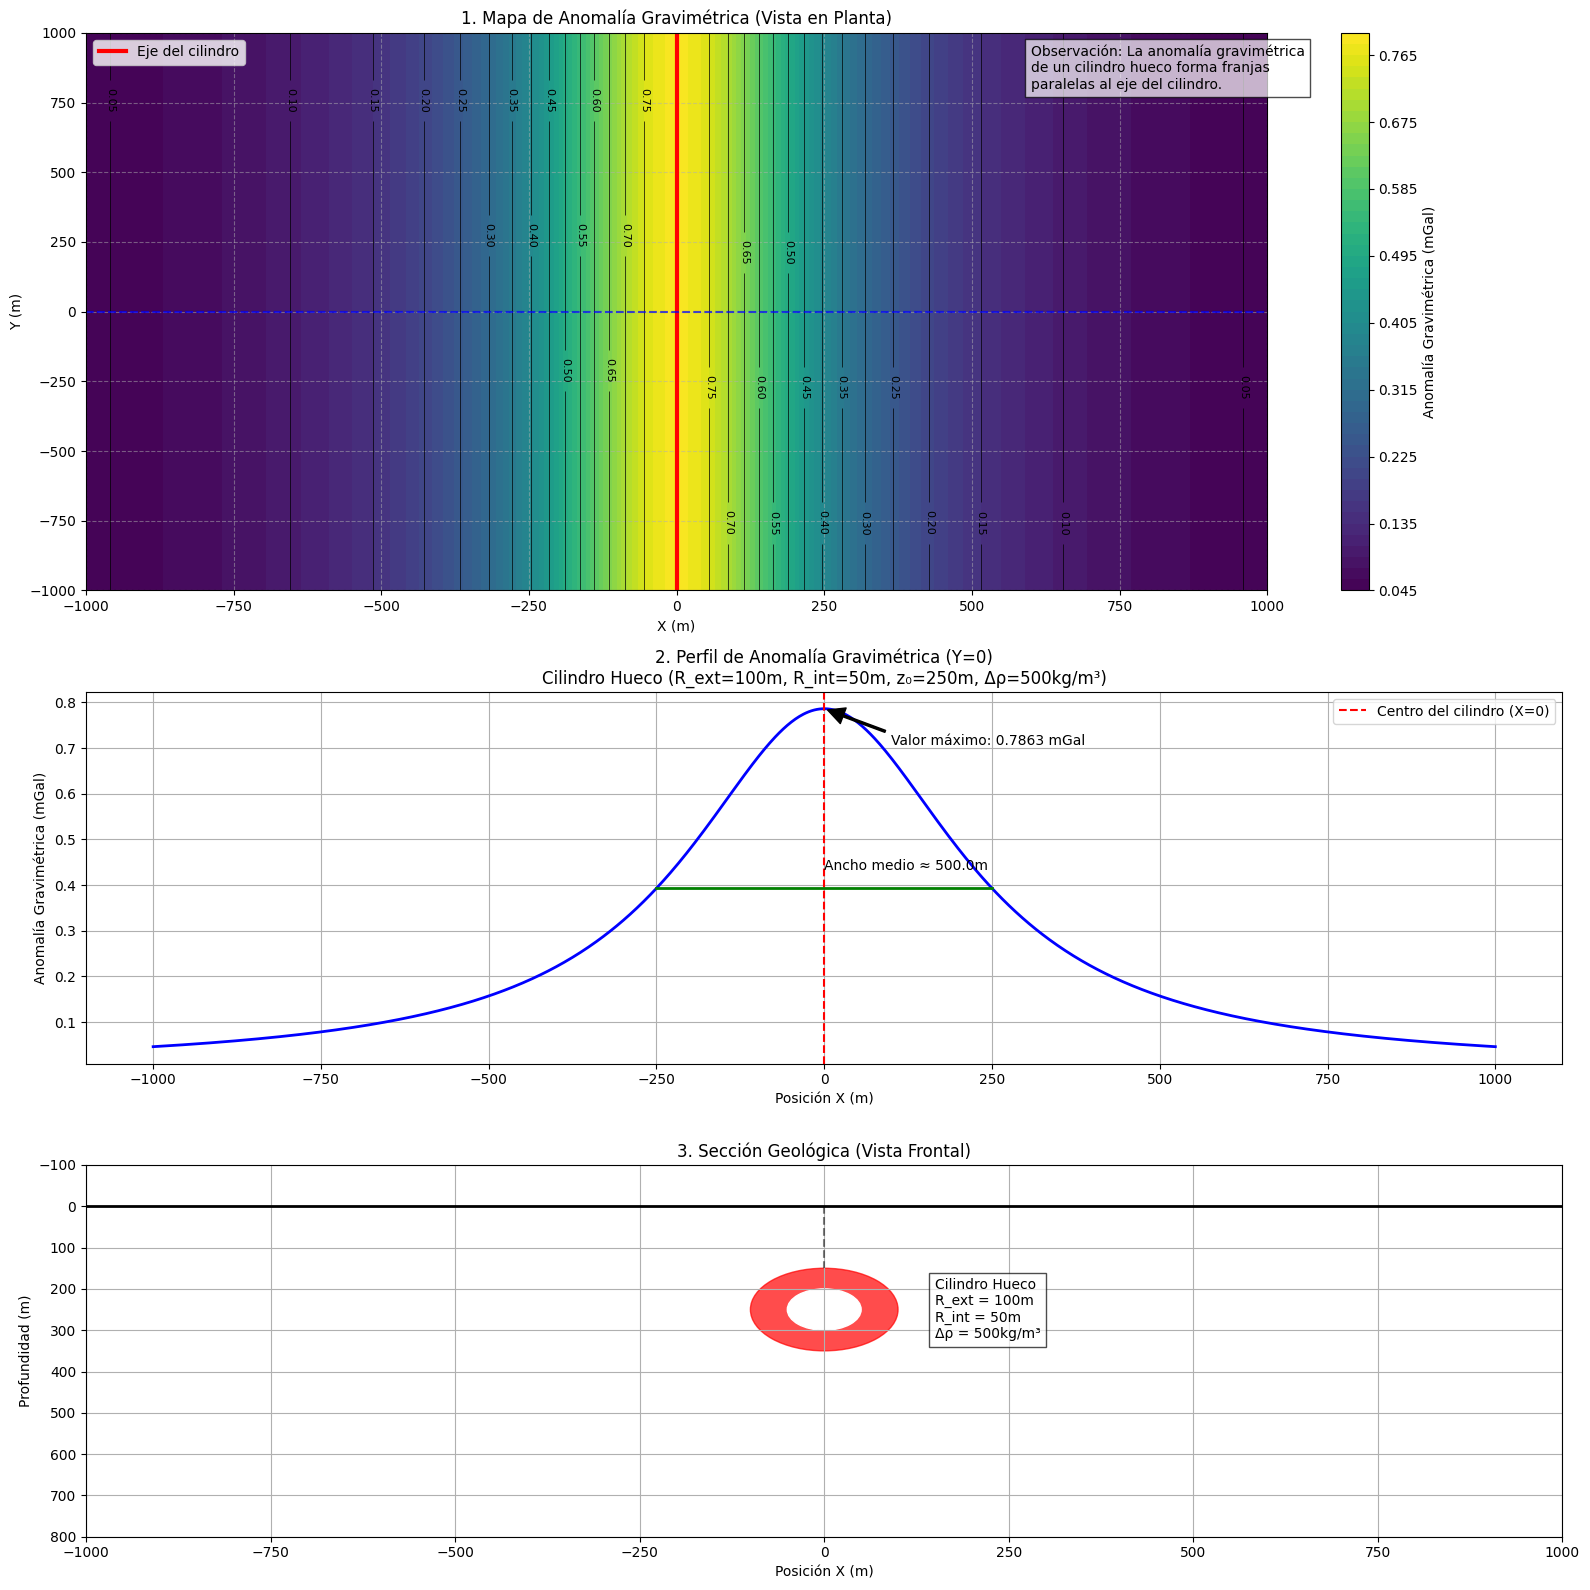

Parámetros del cilindro hueco:
- Radio exterior: 100 m
- Radio interior: 50 m
- Profundidad hasta el centro: 250 m
- Contraste de densidad: 500 kg/m³

Resultados del modelo:
- Valor máximo de anomalía: 0.786285 mGal
- Ancho medio de la anomalía: 500.01 m


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import G

# Parámetros del cilindro hueco
x0 = 0           # Posición X del centro del cilindro (m)
y0 = 0           # Posición Y del centro del cilindro (eje del cilindro) (m)
z0 = 250         # Profundidad del centro del cilindro (m)
rho = 500        # Contraste de densidad (kg/m³)
R_ext = 100      # Radio exterior del cilindro (m)
R_int = 50       # Radio interior del cilindro (m) - la parte hueca

# Función para calcular la anomalía gravimétrica de un cilindro horizontal infinito
def cilindro_infinito_anomalia(x, z0, rho, R):

    # Cálculo de la anomalía utilizando la fórmula analítica
    factor = 2 * np.pi * G * rho * R**2
    g_z = factor * z0 / (x**2 + z0**2)

    # Convertir a mGal (1 mGal = 10⁻⁵ m/s²)
    return g_z * 1e5

# Función para calcular la anomalía de un cilindro hueco (tubo)
def cilindro_hueco_anomalia(x, z0, rho, R_ext, R_int):

    # Cilindro hueco = cilindro exterior - cilindro interior
    g_ext = cilindro_infinito_anomalia(x, z0, rho, R_ext)
    g_int = cilindro_infinito_anomalia(x, z0, rho, R_int)

    # La contribución del cilindro exterior menos la del interior
    # Esto es porque el área interior tiene contraste de densidad cero respecto al medio
    return g_ext * (R_ext**2) / (R_ext**2) - g_int * (R_int**2) / (R_ext**2)

# Crear perfil horizontal para visualizar la anomalía
x_profile = np.linspace(-1000, 1000, 1000)  # Posiciones horizontales (m)
g_profile = cilindro_hueco_anomalia(x_profile - x0, z0, rho, R_ext, R_int)

# Crear malla para vista en planta (mapa)
gridsize = 100
x_grid = np.linspace(-1000, 1000, gridsize)
y_grid = np.linspace(-1000, 1000, gridsize)
X, Y = np.meshgrid(x_grid, y_grid)

# Calcular la distancia perpendicular al eje del cilindro (que está a lo largo del eje Y)
# Para un cilindro a lo largo del eje Y, solo la distancia en X importa
dist_perpendicular = np.abs(X - x0)

# Calcular la anomalía gravimétrica en toda la malla
g_map = cilindro_hueco_anomalia(dist_perpendicular, z0, rho, R_ext, R_int)

# Crear una figura con tres subplots: vista en planta, perfil y sección geológica
fig = plt.figure(figsize=(16, 16))
gs = fig.add_gridspec(3, 1, height_ratios=[1.5, 1, 1])

# 1. Graficar el mapa de la anomalía gravitacional (vista en planta)
ax1 = fig.add_subplot(gs[0])
contourf = ax1.contourf(X, Y, g_map, levels=50, cmap='viridis')
plt.colorbar(contourf, ax=ax1, label='Anomalía Gravimétrica (mGal)')

# Dibujar el eje del cilindro (una línea vertical a lo largo del eje Y)
ax1.plot([x0, x0], [np.min(y_grid), np.max(y_grid)], 'r-', linewidth=3, label='Eje del cilindro')

# Añadir contornos en negro
contour = ax1.contour(X, Y, g_map, levels=15, colors='black', linewidths=0.5)
ax1.clabel(contour, inline=True, fontsize=8, colors='black')

ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')
ax1.set_title('1. Mapa de Anomalía Gravimétrica (Vista en Planta)')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.5)

# Mostrar las franjas donde se tomaron los perfiles
ax1.axhline(y=y0, color='blue', linestyle='--', alpha=0.7, label='Línea de perfil')

# Añadir una pequeña explicación sobre el patrón
ax1.text(np.max(x_grid)*0.6, np.max(y_grid)*0.8,
         "Observación: La anomalía gravimétrica\nde un cilindro hueco forma franjas\nparalelas al eje del cilindro.",
         bbox=dict(facecolor='white', alpha=0.7))

# 2. Graficar el perfil de anomalía
ax2 = fig.add_subplot(gs[1])
ax2.plot(x_profile, g_profile, 'b-', linewidth=2)
ax2.axvline(x=x0, color='r', linestyle='--', label=f'Centro del cilindro (X={x0})')
ax2.set_xlabel('Posición X (m)')
ax2.set_ylabel('Anomalía Gravimétrica (mGal)')
ax2.set_title(f'2. Perfil de Anomalía Gravimétrica (Y=0)\nCilindro Hueco (R_ext={R_ext}m, R_int={R_int}m, z₀={z0}m, Δρ={rho}kg/m³)')
ax2.grid(True)
ax2.legend()

# Calcular y mostrar valores importantes
max_value = np.max(g_profile)
ax2.annotate(f'Valor máximo: {max_value:.4f} mGal',
             xy=(x0, max_value), xytext=(x0+100, max_value*0.9),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

# Añadir líneas que muestran el ancho medio de la anomalía
half_max = max_value / 2
x_half_left = np.interp(half_max, g_profile[x_profile < x0], x_profile[x_profile < x0])
x_half_right = np.interp(half_max, np.flip(g_profile[x_profile > x0]), np.flip(x_profile[x_profile > x0]))
width = x_half_right - x_half_left

ax2.plot([x_half_left, x_half_right], [half_max, half_max], 'g-', linewidth=2)
ax2.text((x_half_left + x_half_right)/2, half_max*1.1, f'Ancho medio ≈ {width:.1f}m')

# 3. Graficar la sección geológica
ax3 = fig.add_subplot(gs[2])
ax3.set_ylim(800, -100)  # Invertir eje Y para representar profundidad
ax3.set_xlim(np.min(x_profile), np.max(x_profile))
ax3.set_xlabel('Posición X (m)')
ax3.set_ylabel('Profundidad (m)')
ax3.set_title('3. Sección Geológica (Vista Frontal)')
ax3.grid(True)

# Dibujar la superficie
ax3.axhline(y=0, color='black', linestyle='-', linewidth=2, label='Superficie')

# Dibujar el cilindro exterior
circle_ext = plt.Circle((x0, z0), R_ext, fill=True, color='r', alpha=0.7, label='Cilindro Exterior')
ax3.add_patch(circle_ext)

# Dibujar el cilindro interior (parte hueca)
circle_int = plt.Circle((x0, z0), R_int, fill=True, color='white', edgecolor='black', alpha=1.0, label='Parte Hueca')
ax3.add_patch(circle_int)

# Añadir línea punteada desde la superficie hasta el cilindro
ax3.plot([x0, x0], [0, z0-R_ext], 'k--', alpha=0.5)

# Añadir texto informativo
ax3.text(x0+1.5*R_ext, z0, f'Cilindro Hueco\nR_ext = {R_ext}m\nR_int = {R_int}m\nΔρ = {rho}kg/m³',
         verticalalignment='center', bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

# Calcular y mostrar valores clave en la consola
print(f"Parámetros del cilindro hueco:")
print(f"- Radio exterior: {R_ext} m")
print(f"- Radio interior: {R_int} m")
print(f"- Profundidad hasta el centro: {z0} m")
print(f"- Contraste de densidad: {rho} kg/m³")
print(f"\nResultados del modelo:")
print(f"- Valor máximo de anomalía: {max_value:.6f} mGal")
print(f"- Ancho medio de la anomalía: {width:.2f} m")

<ipython-input-12-af9d642f94bf>:121: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle_int = plt.Circle((x0, z0), R_int, fill=True, color='white', edgecolor='black', alpha=1.0, label='Parte Hueca')


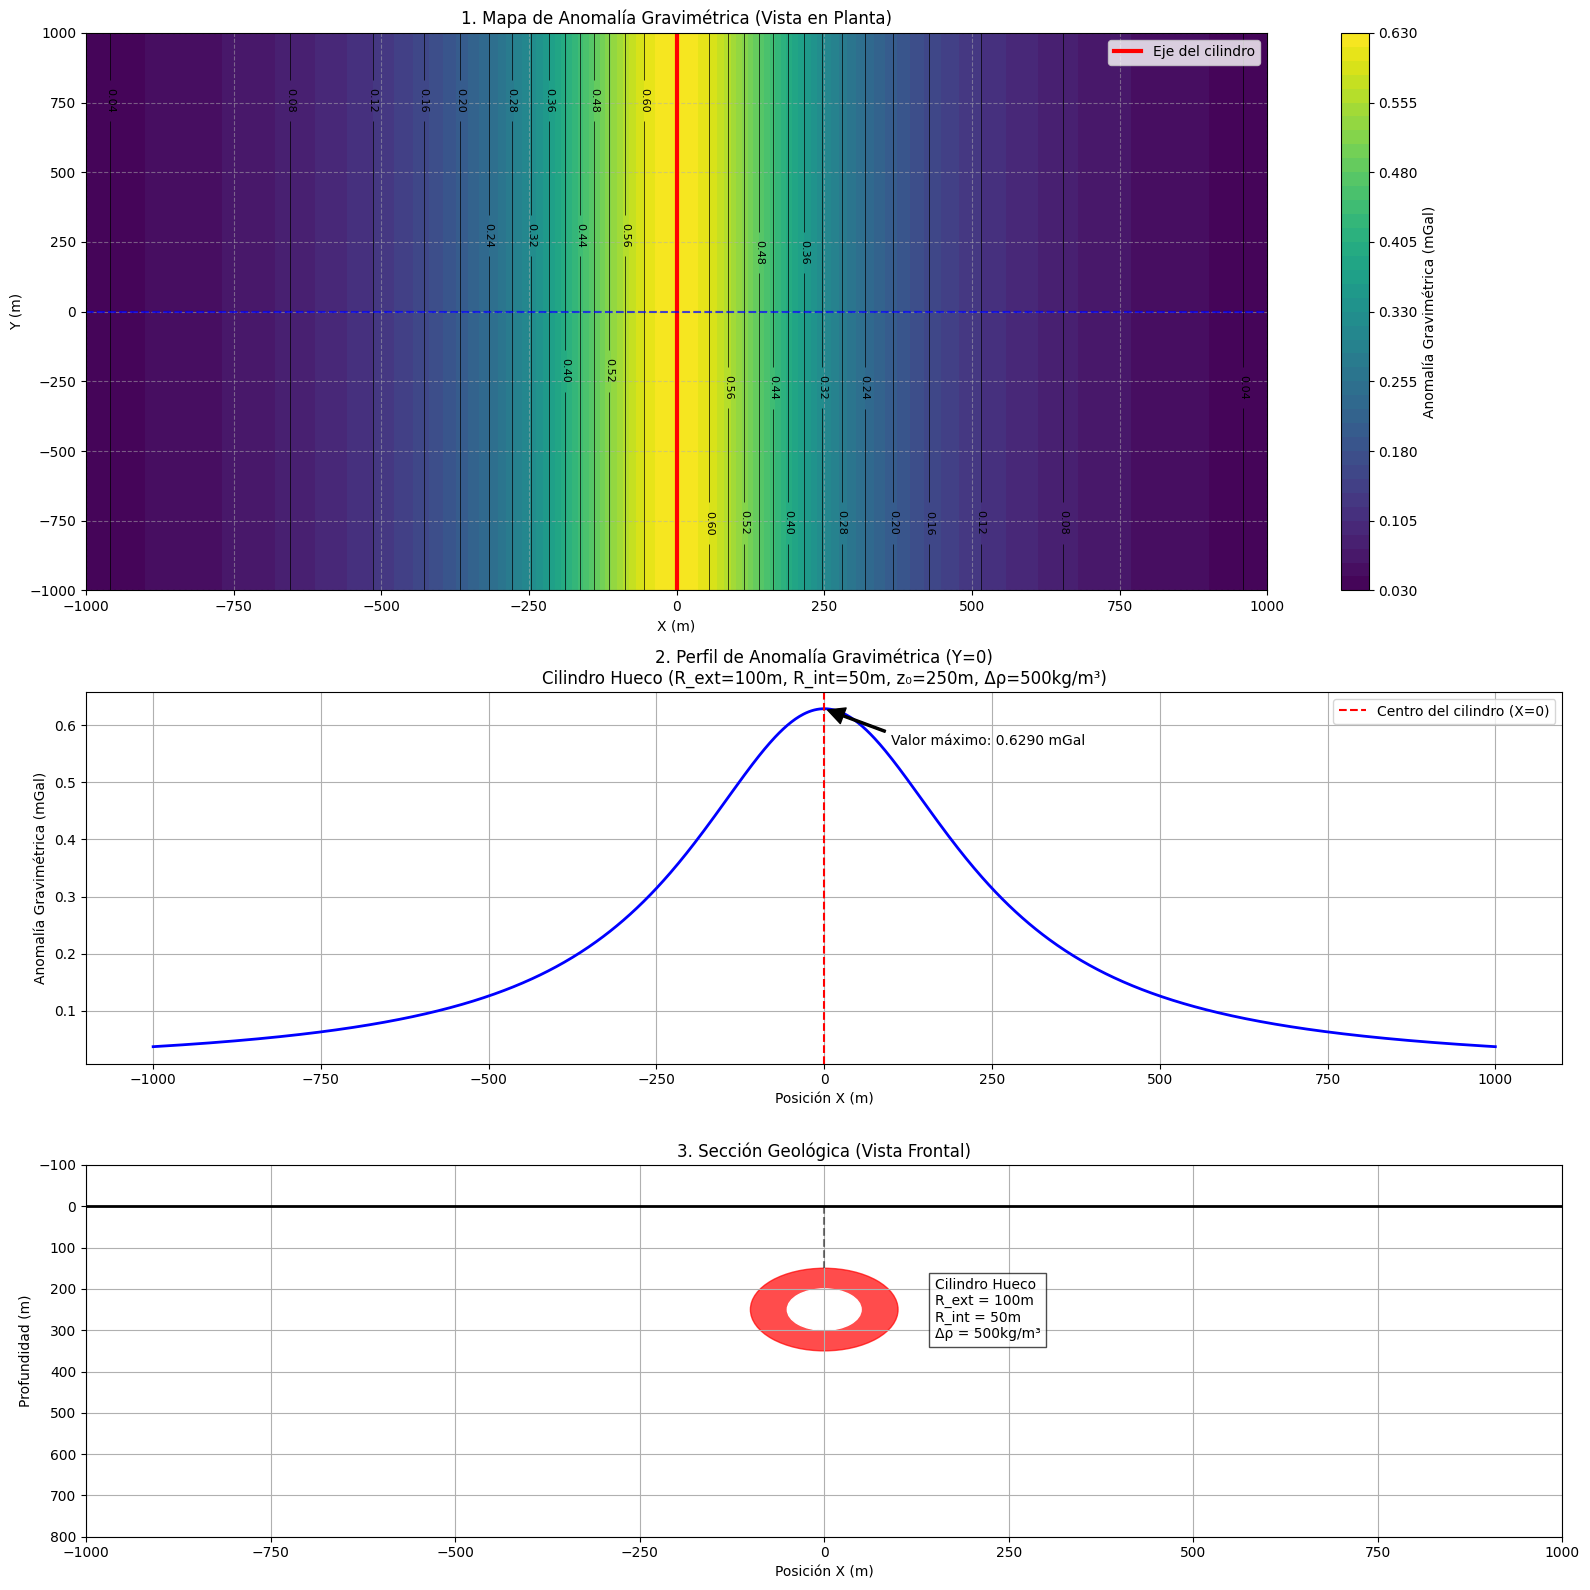

Parámetros del cilindro hueco:
- Radio exterior: 100 m
- Radio interior: 50 m
- Profundidad hasta el centro: 250 m
- Contraste de densidad: 500 kg/m³

Resultados del modelo:
- Valor máximo de anomalía: 0.629028 mGal


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import G

# Parámetros del cilindro hueco
x0 = 0           # Posición X del centro del cilindro (m)
y0 = 0           # Posición Y del centro del cilindro (eje del cilindro) (m)
z0 = 250         # Profundidad del centro del cilindro (m)
rho = 500        # Contraste de densidad (kg/m³)
R_ext = 100      # Radio exterior del cilindro (m)
R_int = 50       # Radio interior del cilindro (m) - la parte hueca

# Función para calcular la anomalía gravimétrica de un cilindro horizontal infinito
def cilindro_infinito_anomalia(x, z0, rho, R):
    """
    Calcula la anomalía gravimétrica de un cilindro horizontal infinito.

    Parámetros:
    -----------
    x : array
        Distancia horizontal perpendicular al eje del cilindro (m)
    z0 : float
        Profundidad hasta el centro del cilindro (m)
    rho : float
        Contraste de densidad (kg/m³)
    R : float
        Radio del cilindro (m)

    Retorna:
    --------
    array
        Anomalía gravimétrica en mGal
    """
    # Cálculo de la anomalía utilizando la fórmula analítica
    factor = 2 * np.pi * G * rho * R**2
    g_z = factor * z0 / (x**2 + z0**2)

    # Convertir a mGal (1 mGal = 10⁻⁵ m/s²)
    return g_z * 1e5

# Crear perfil horizontal para visualizar la anomalía
x_profile = np.linspace(-1000, 1000, 1000)  # Posiciones horizontales (m)

# Calcular la anomalía del cilindro hueco restando el cilindro interno del externo
g_externo = cilindro_infinito_anomalia(x_profile - x0, z0, rho, R_ext)
g_interno = cilindro_infinito_anomalia(x_profile - x0, z0, rho, R_int)
g_profile = g_externo - g_interno

# Crear malla para vista en planta (mapa)
gridsize = 100
x_grid = np.linspace(-1000, 1000, gridsize)
y_grid = np.linspace(-1000, 1000, gridsize)
X, Y = np.meshgrid(x_grid, y_grid)

# Calcular la distancia perpendicular al eje del cilindro
dist_perpendicular = np.abs(X - x0)

# Calcular la anomalía gravimétrica en toda la malla
g_externo_map = cilindro_infinito_anomalia(dist_perpendicular, z0, rho, R_ext)
g_interno_map = cilindro_infinito_anomalia(dist_perpendicular, z0, rho, R_int)
g_map = g_externo_map - g_interno_map

# Crear una figura con tres subplots: vista en planta, perfil y sección geológica
fig = plt.figure(figsize=(16, 16))
gs = fig.add_gridspec(3, 1, height_ratios=[1.5, 1, 1])

# 1. Graficar el mapa de la anomalía gravitacional (vista en planta)
ax1 = fig.add_subplot(gs[0])
contourf = ax1.contourf(X, Y, g_map, levels=50, cmap='viridis')
plt.colorbar(contourf, ax=ax1, label='Anomalía Gravimétrica (mGal)')

# Dibujar el eje del cilindro (una línea vertical a lo largo del eje Y)
ax1.plot([x0, x0], [np.min(y_grid), np.max(y_grid)], 'r-', linewidth=3, label='Eje del cilindro')

# Añadir contornos en negro
contour = ax1.contour(X, Y, g_map, levels=15, colors='black', linewidths=0.5)
ax1.clabel(contour, inline=True, fontsize=8, colors='black')

ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')
ax1.set_title('1. Mapa de Anomalía Gravimétrica (Vista en Planta)')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.5)

# Mostrar las franjas donde se tomaron los perfiles
ax1.axhline(y=y0, color='blue', linestyle='--', alpha=0.7, label='Línea de perfil')

# 2. Graficar el perfil de anomalía
ax2 = fig.add_subplot(gs[1])
ax2.plot(x_profile, g_profile, 'b-', linewidth=2)
ax2.axvline(x=x0, color='r', linestyle='--', label=f'Centro del cilindro (X={x0})')
ax2.set_xlabel('Posición X (m)')
ax2.set_ylabel('Anomalía Gravimétrica (mGal)')
ax2.set_title(f'2. Perfil de Anomalía Gravimétrica (Y=0)\nCilindro Hueco (R_ext={R_ext}m, R_int={R_int}m, z₀={z0}m, Δρ={rho}kg/m³)')
ax2.grid(True)
ax2.legend()

# Calcular y mostrar valores importantes
max_value = np.max(g_profile)
ax2.annotate(f'Valor máximo: {max_value:.4f} mGal',
             xy=(x0, max_value), xytext=(x0+100, max_value*0.9),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

# 3. Graficar la sección geológica
ax3 = fig.add_subplot(gs[2])
ax3.set_ylim(800, -100)  # Invertir eje Y para representar profundidad
ax3.set_xlim(np.min(x_profile), np.max(x_profile))
ax3.set_xlabel('Posición X (m)')
ax3.set_ylabel('Profundidad (m)')
ax3.set_title('3. Sección Geológica (Vista Frontal)')
ax3.grid(True)

# Dibujar la superficie
ax3.axhline(y=0, color='black', linestyle='-', linewidth=2, label='Superficie')

# Dibujar el cilindro exterior
circle_ext = plt.Circle((x0, z0), R_ext, fill=True, color='r', alpha=0.7, label='Cilindro Exterior')
ax3.add_patch(circle_ext)

# Dibujar el cilindro interior (parte hueca)
circle_int = plt.Circle((x0, z0), R_int, fill=True, color='white', edgecolor='black', alpha=1.0, label='Parte Hueca')
ax3.add_patch(circle_int)

# Añadir línea punteada desde la superficie hasta el cilindro
ax3.plot([x0, x0], [0, z0-R_ext], 'k--', alpha=0.5)

# Añadir texto informativo
ax3.text(x0+1.5*R_ext, z0, f'Cilindro Hueco\nR_ext = {R_ext}m\nR_int = {R_int}m\nΔρ = {rho}kg/m³',
         verticalalignment='center', bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()

# Calcular y mostrar valores clave en la consola
print(f"Parámetros del cilindro hueco:")
print(f"- Radio exterior: {R_ext} m")
print(f"- Radio interior: {R_int} m")
print(f"- Profundidad hasta el centro: {z0} m")
print(f"- Contraste de densidad: {rho} kg/m³")
print(f"\nResultados del modelo:")
print(f"- Valor máximo de anomalía: {max_value:.6f} mGal")

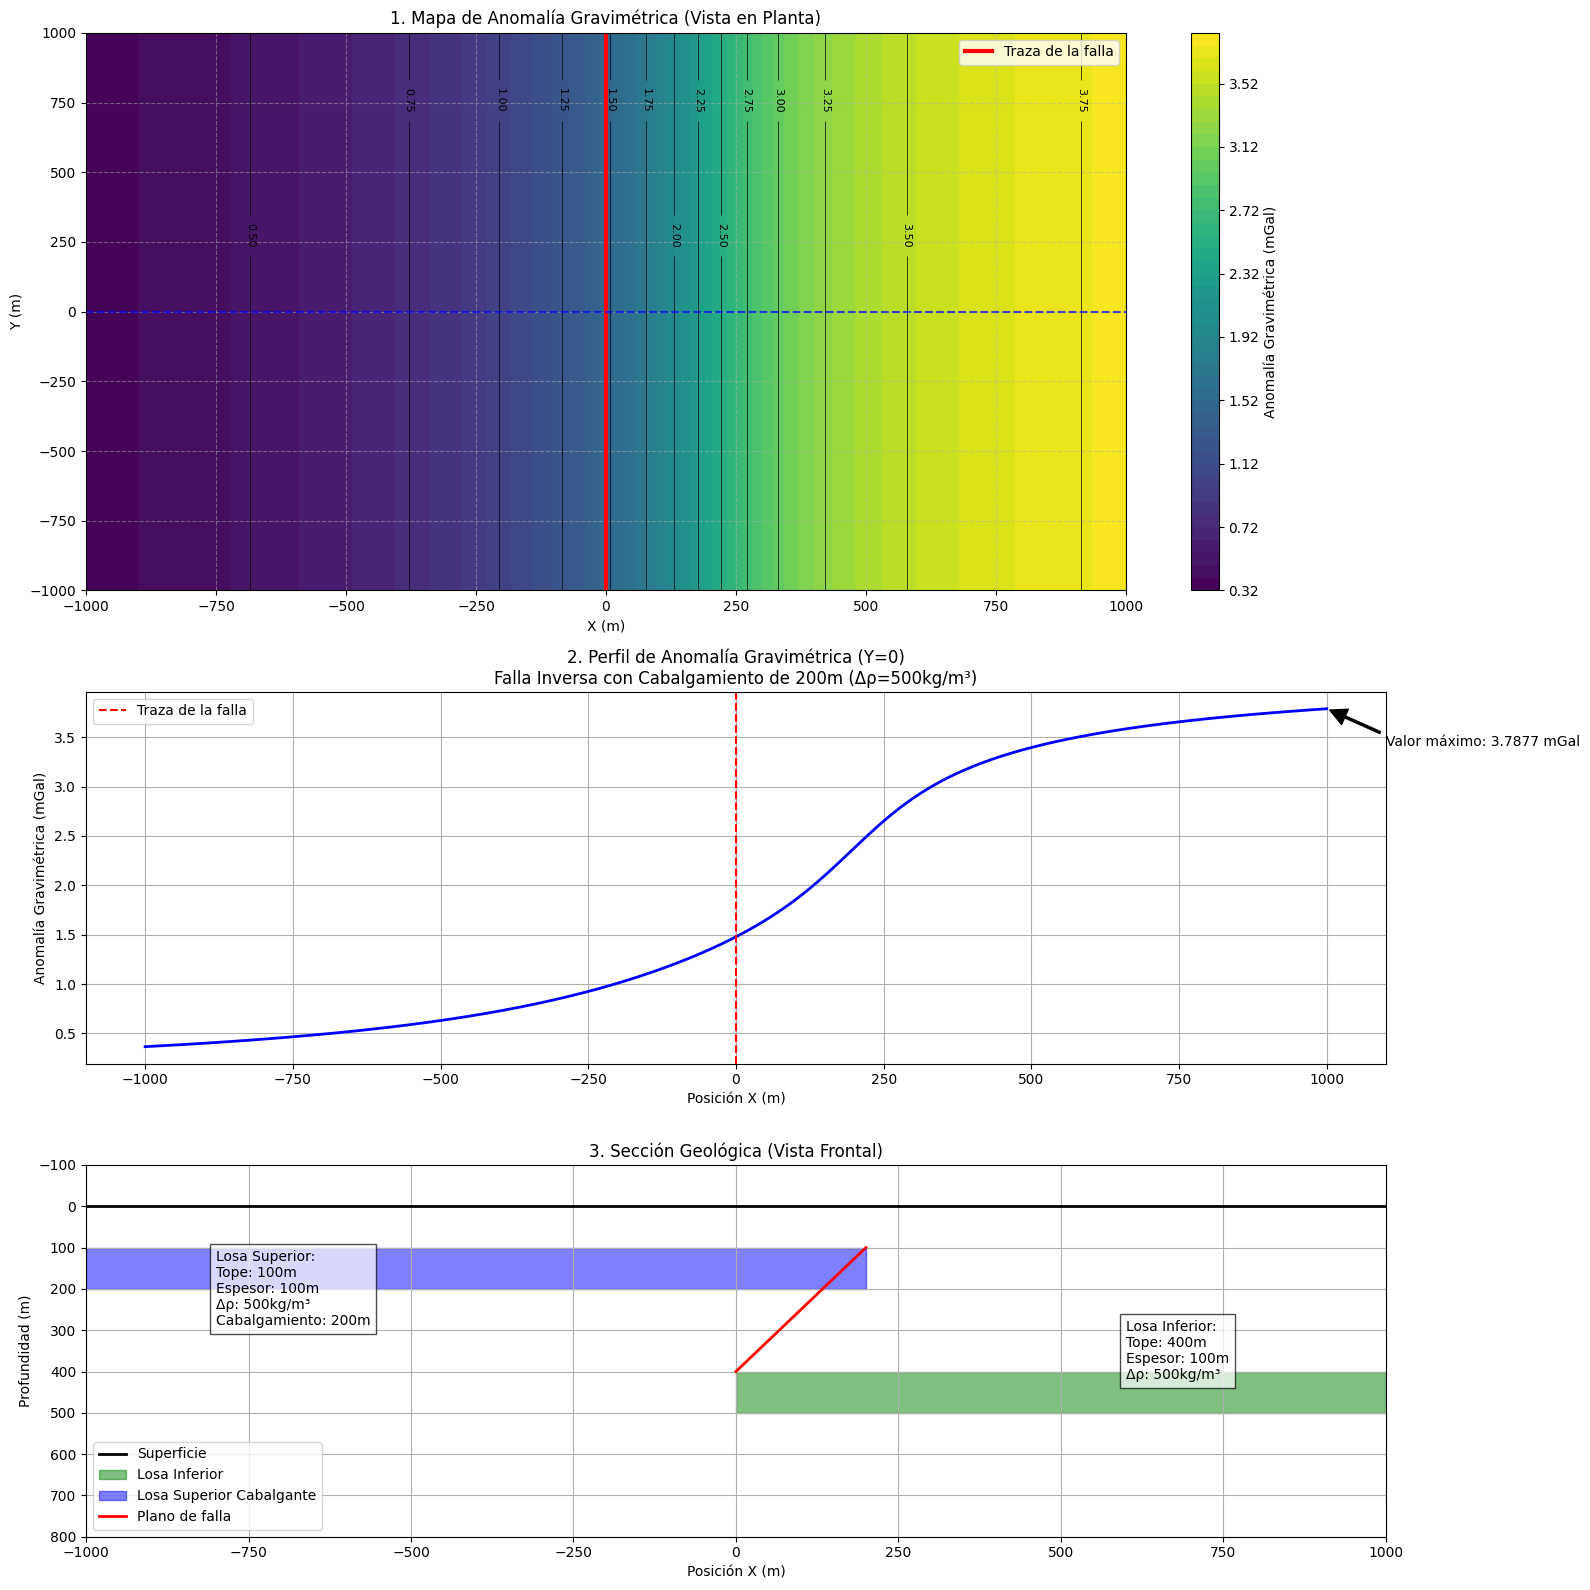

Parámetros de la falla inversa:
- Posición de la falla en superficie: x = 0 m
- Cabalgamiento: 200 m
- Losa superior: profundidad = 100 m, espesor = 100 m
- Losa inferior: profundidad = 400 m, espesor = 100 m
- Contraste de densidad: 500 kg/m³

Resultados del modelo:
- Valor máximo de anomalía: 3.787654 mGal


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import G

# Parámetros de la falla inversa
x_falla = 0       # Posición X de la falla en superficie (m)
x_cabalgamiento = 200  # Cantidad de cabalgamiento (cuánto se monta la losa superior)
y0 = 0            # Posición Y de la línea de perfil (m)
z1 = 100          # Profundidad del tope de la primera losa (m)
z2 = 400          # Profundidad del tope de la segunda losa (m)
h1 = 100          # Espesor de la primera losa (m)
h2 = 100          # Espesor de la segunda losa (m)
rho = 500         # Contraste de densidad (kg/m³)

# Función para calcular la anomalía gravimétrica de una losa semi-infinita
def losa_semi_infinita_anomalia(x, z0, h, rho, lado='derecha'):

    # Factor para convertir a mGal
    factor = 2 * G * rho * 1e5

    # Posición del centro de la losa
    z_centro = z0 + h/2

    # Ángulo subtendido por la losa
    if lado == 'derecha':
        phi = np.pi/2 + np.arctan2(x, z_centro)
    else:  # lado == 'izquierda'
        phi = np.pi/2 - np.arctan2(-x, z_centro)

    # Anomalía gravimétrica
    g_z = factor * h * phi

    return g_z

# Función para calcular la anomalía de una losa finita (trapezoidal)
def losa_finita_anomalia(x, x1, x2, z0, h, rho):
    """
    Calcula la anomalía gravimétrica de una losa horizontal finita.

    Parámetros:
    -----------
    x : array
        Posiciones horizontales de observación (m)
    x1, x2 : float
        Límites horizontales de la losa (m)
    z0 : float
        Profundidad hasta el tope de la losa (m)
    h : float
        Espesor de la losa (m)
    rho : float
        Contraste de densidad (kg/m³)

    Retorna:
    --------
    array
        Anomalía gravimétrica en mGal
    """
    # Calcular como la diferencia de dos losas semi-infinitas
    g_izq = losa_semi_infinita_anomalia(x - x1, z0, h, rho, lado='derecha')
    g_der = losa_semi_infinita_anomalia(x - x2, z0, h, rho, lado='derecha')

    return g_izq - g_der

# Crear perfil horizontal para visualizar la anomalía
x_profile = np.linspace(-1000, 1000, 1000)  # Posiciones horizontales (m)

# Calcular la anomalía de la estructura de falla inversa:
# 1. Losa inferior (semi-infinita hacia la derecha)
g_losa_inf = losa_semi_infinita_anomalia(x_profile - x_falla, z2, h2, rho, lado='derecha')

# 2. Losa superior cabalgante (semi-infinita hacia la izquierda)
g_losa_sup = losa_semi_infinita_anomalia(x_profile - (x_falla + x_cabalgamiento), z1, h1, rho, lado='izquierda')

# Anomalía total: suma de ambas losas
g_profile = g_losa_inf + g_losa_sup

# Crear malla para vista en planta (mapa)
gridsize = 100
x_grid = np.linspace(-1000, 1000, gridsize)
y_grid = np.linspace(-1000, 1000, gridsize)
X, Y = np.meshgrid(x_grid, y_grid)

# Calcular la anomalía gravimétrica en toda la malla
g_map = np.zeros_like(X)
for i in range(len(y_grid)):
    # Losa inferior (semi-infinita hacia la derecha)
    g_inf_map = losa_semi_infinita_anomalia(X[i,:] - x_falla, z2, h2, rho, lado='derecha')

    # Losa superior cabalgante (semi-infinita hacia la izquierda)
    g_sup_map = losa_semi_infinita_anomalia(X[i,:] - (x_falla + x_cabalgamiento), z1, h1, rho, lado='izquierda')

    # Anomalía total en esta fila
    g_map[i,:] = g_inf_map + g_sup_map

# Crear una figura con tres subplots
fig = plt.figure(figsize=(16, 16))
gs = fig.add_gridspec(3, 1, height_ratios=[1.5, 1, 1])

# 1. Graficar el mapa de la anomalía gravitacional (vista en planta)
ax1 = fig.add_subplot(gs[0])
contourf = ax1.contourf(X, Y, g_map, levels=50, cmap='viridis')
plt.colorbar(contourf, ax=ax1, label='Anomalía Gravimétrica (mGal)')

# Dibujar la traza de la falla en superficie
ax1.plot([x_falla, x_falla], [np.min(y_grid), np.max(y_grid)], 'r-', linewidth=3, label='Traza de la falla')

# Añadir contornos en negro
contour = ax1.contour(X, Y, g_map, levels=15, colors='black', linewidths=0.5)
ax1.clabel(contour, inline=True, fontsize=8, colors='black')

ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')
ax1.set_title('1. Mapa de Anomalía Gravimétrica (Vista en Planta)')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.5)

# Mostrar la línea donde se tomó el perfil
ax1.axhline(y=y0, color='blue', linestyle='--', alpha=0.7, label='Línea de perfil')

# 2. Graficar el perfil de anomalía
ax2 = fig.add_subplot(gs[1])
ax2.plot(x_profile, g_profile, 'b-', linewidth=2)
ax2.axvline(x=x_falla, color='r', linestyle='--', label='Traza de la falla')
ax2.set_xlabel('Posición X (m)')
ax2.set_ylabel('Anomalía Gravimétrica (mGal)')
ax2.set_title(f'2. Perfil de Anomalía Gravimétrica (Y=0)\nFalla Inversa con Cabalgamiento de {x_cabalgamiento}m (Δρ={rho}kg/m³)')
ax2.grid(True)
ax2.legend()

# Calcular y mostrar valores importantes
max_value = np.max(g_profile)
max_pos = x_profile[np.argmax(g_profile)]
ax2.annotate(f'Valor máximo: {max_value:.4f} mGal',
             xy=(max_pos, max_value), xytext=(max_pos+100, max_value*0.9),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

# 3. Graficar la sección geológica
ax3 = fig.add_subplot(gs[2])
ax3.set_ylim(800, -100)  # Invertir eje Y para representar profundidad
ax3.set_xlim(np.min(x_profile), np.max(x_profile))
ax3.set_xlabel('Posición X (m)')
ax3.set_ylabel('Profundidad (m)')
ax3.set_title('3. Sección Geológica (Vista Frontal)')
ax3.grid(True)

# Dibujar la superficie
ax3.axhline(y=0, color='black', linestyle='-', linewidth=2, label='Superficie')

# Dibujar la losa inferior (bloque hundido, semi-infinito hacia la derecha)
x_inf_coords = [x_falla, 1000]
y_inf_top = [z2, z2]
y_inf_bottom = [z2 + h2, z2 + h2]
ax3.fill_between(x_inf_coords, y_inf_top, y_inf_bottom, color='green', alpha=0.5, label='Losa Inferior')

# Dibujar la losa superior cabalgante (bloque levantado, semi-infinito hacia la izquierda)
x_sup_coords = [-1000, x_falla + x_cabalgamiento]
y_sup_top = [z1, z1]
y_sup_bottom = [z1 + h1, z1 + h1]
ax3.fill_between(x_sup_coords, y_sup_top, y_sup_bottom, color='blue', alpha=0.5, label='Losa Superior Cabalgante')

# Dibujar el plano de falla (línea que conecta los bordes de las losas)
ax3.plot([x_falla, x_falla + x_cabalgamiento], [z2, z1], 'r-', linewidth=2, label='Plano de falla')

# Añadir texto informativo
ax3.text(-800, 200, f'Losa Superior:\nTope: {z1}m\nEspesor: {h1}m\nΔρ: {rho}kg/m³\nCabalgamiento: {x_cabalgamiento}m',
         verticalalignment='center', bbox=dict(facecolor='white', alpha=0.7))

ax3.text(600, 350, f'Losa Inferior:\nTope: {z2}m\nEspesor: {h2}m\nΔρ: {rho}kg/m³',
         verticalalignment='center', bbox=dict(facecolor='white', alpha=0.7))

ax3.legend()

plt.tight_layout()
plt.show()

# Calcular y mostrar valores clave en la consola
print(f"Parámetros de la falla inversa:")
print(f"- Posición de la falla en superficie: x = {x_falla} m")
print(f"- Cabalgamiento: {x_cabalgamiento} m")
print(f"- Losa superior: profundidad = {z1} m, espesor = {h1} m")
print(f"- Losa inferior: profundidad = {z2} m, espesor = {h2} m")
print(f"- Contraste de densidad: {rho} kg/m³")
print(f"\nResultados del modelo:")
print(f"- Valor máximo de anomalía: {max_value:.6f} mGal")

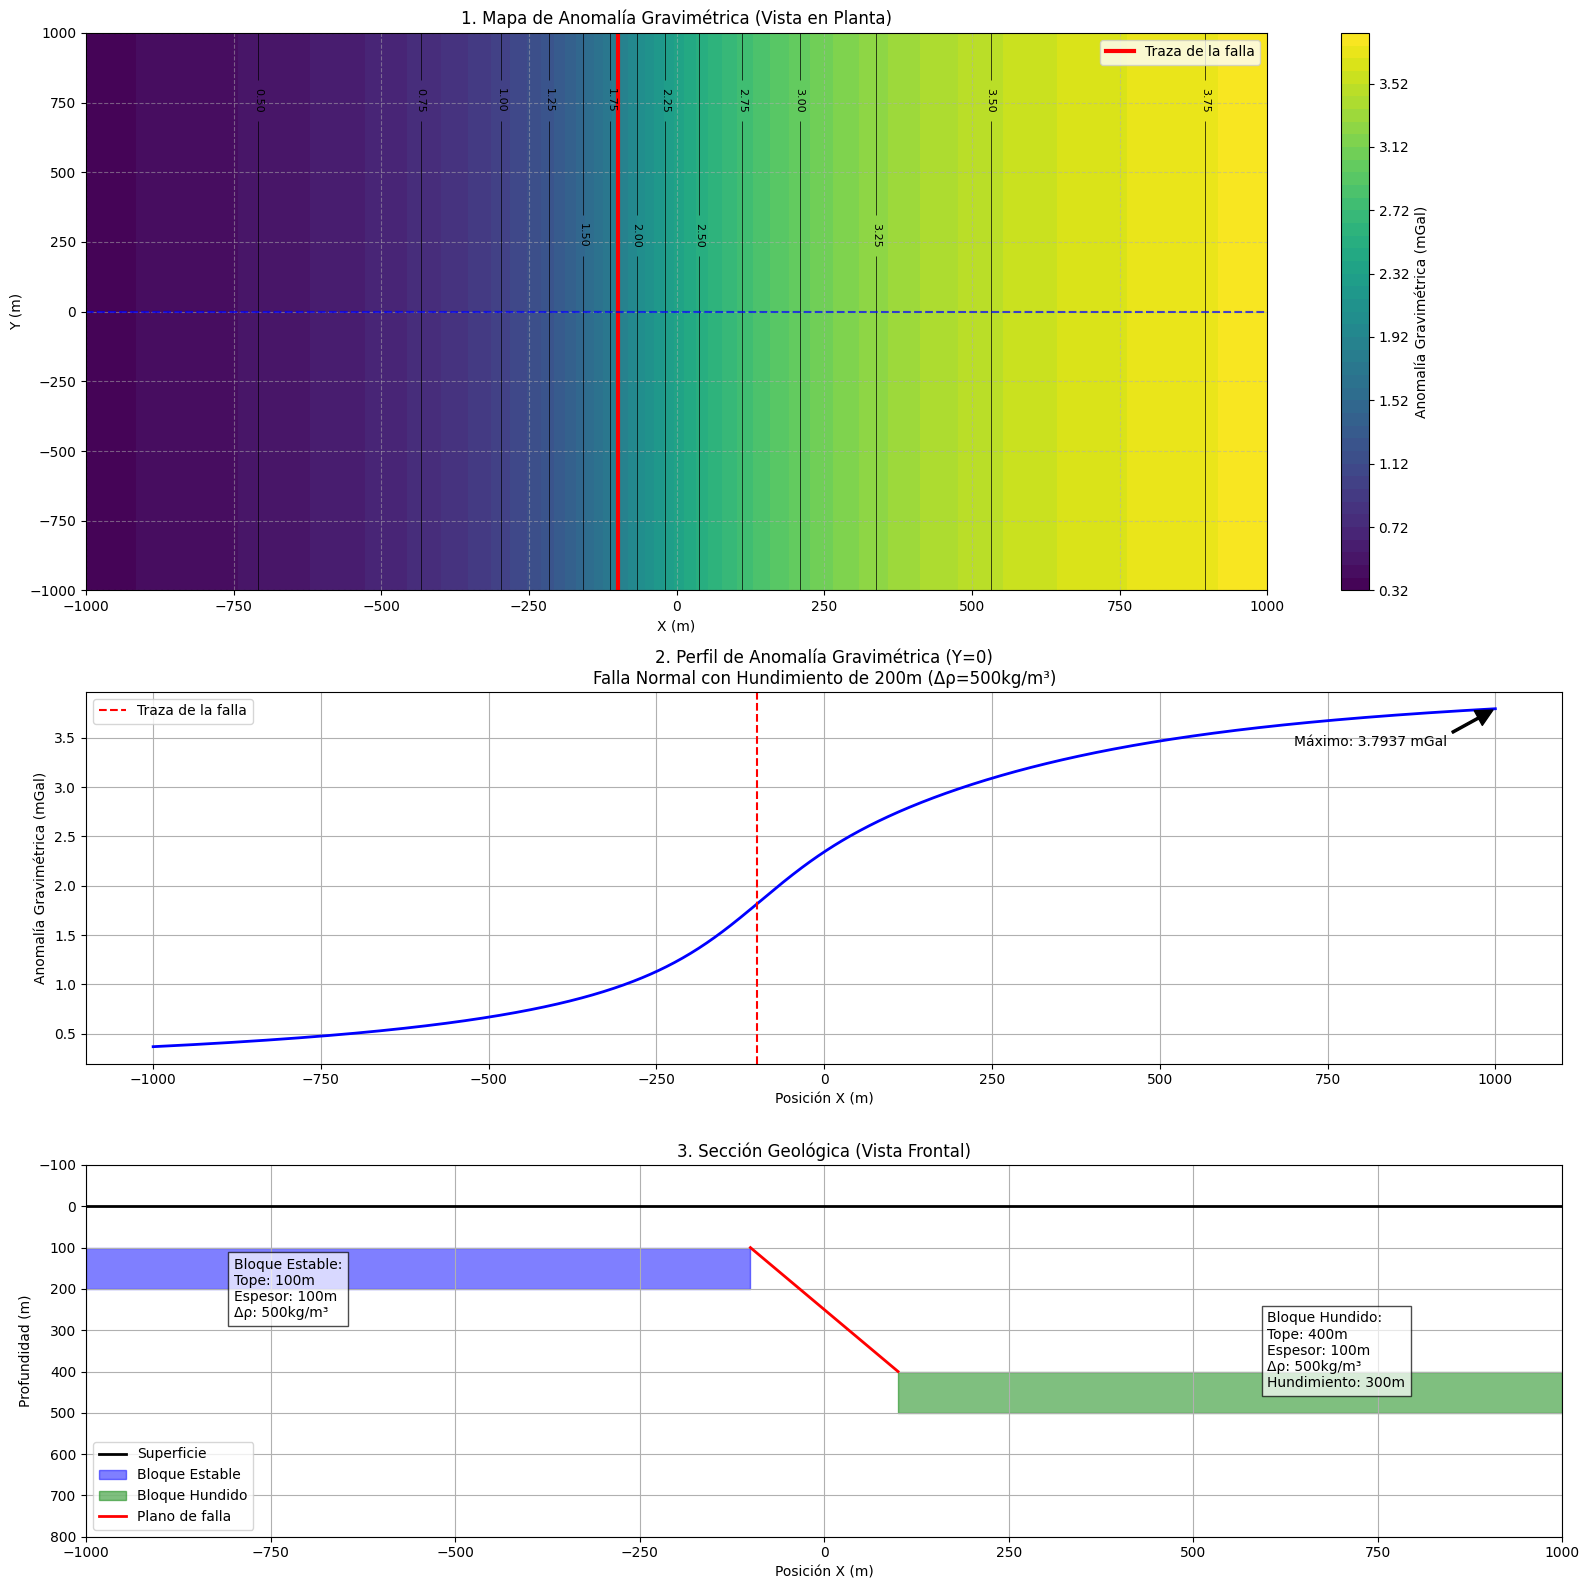

Parámetros de la falla normal:
- Posición de la falla en superficie: x = -100 m
- Desplazamiento horizontal: 200 m
- Desplazamiento vertical: 300 m
- Bloque estable: profundidad = 100 m, espesor = 100 m
- Bloque hundido: profundidad = 400 m, espesor = 100 m
- Contraste de densidad: 500 kg/m³

Resultados del modelo:
- Valor máximo de anomalía: 3.793679 mGal


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import G

# Parámetros de la falla normal
x_falla = -100       # Posición X de la falla en superficie (m)
x_hundimiento = 200  # Cantidad de hundimiento horizontal (m)
y0 = 0            # Posición Y de la línea de perfil (m)
z1 = 100          # Profundidad del tope de la primera losa (bloque estable) (m)
z2 = 400          # Profundidad del tope de la segunda losa (bloque hundido) (m)
h1 = 100          # Espesor de la primera losa (m)
h2 = 100          # Espesor de la segunda losa (m)
rho = 500         # Contraste de densidad (kg/m³)

# Función para calcular la anomalía gravimétrica de una losa semi-infinita
def losa_semi_infinita_anomalia(x, z0, h, rho, lado='derecha'):
    """
    Calcula la anomalía gravimétrica de una losa horizontal semi-infinita.

    Parámetros:
    -----------
    x : array
        Posiciones horizontales de observación (m)
    z0 : float
        Profundidad hasta el tope de la losa (m)
    h : float
        Espesor de la losa (m)
    rho : float
        Contraste de densidad (kg/m³)
    lado : str
        'derecha' si la losa se extiende hacia x positivo, 'izquierda' para x negativo

    Retorna:
    --------
    array
        Anomalía gravimétrica en mGal
    """
    # Factor para convertir a mGal
    factor = 2 * G * rho * 1e5

    # Posición del centro de la losa
    z_centro = z0 + h/2

    # Ángulo subtendido por la losa
    if lado == 'derecha':
        phi = np.pi/2 + np.arctan2(x, z_centro)
    else:  # lado == 'izquierda'
        phi = np.pi/2 - np.arctan2(-x, z_centro)

    # Anomalía gravimétrica
    g_z = factor * h * phi

    return g_z

# Crear perfil horizontal para visualizar la anomalía
x_profile = np.linspace(-1000, 1000, 1000)  # Posiciones horizontales (m)

# Calcular la anomalía de la estructura de falla normal:
# 1. Losa izquierda (bloque estable, semi-infinita hacia la izquierda)
g_losa_izq = losa_semi_infinita_anomalia(x_profile - x_falla, z1, h1, rho, lado='izquierda')

# 2. Losa derecha (bloque hundido, semi-infinita hacia la derecha)
g_losa_der = losa_semi_infinita_anomalia(x_profile - (x_falla + x_hundimiento), z2, h2, rho, lado='derecha')

# Anomalía total: suma de ambas losas
g_profile = g_losa_izq + g_losa_der

# Crear malla para vista en planta (mapa)
gridsize = 100
x_grid = np.linspace(-1000, 1000, gridsize)
y_grid = np.linspace(-1000, 1000, gridsize)
X, Y = np.meshgrid(x_grid, y_grid)

# Calcular la anomalía gravimétrica en toda la malla
g_map = np.zeros_like(X)
for i in range(len(y_grid)):
    # Losa izquierda (bloque estable)
    g_izq_map = losa_semi_infinita_anomalia(X[i,:] - x_falla, z1, h1, rho, lado='izquierda')

    # Losa derecha (bloque hundido)
    g_der_map = losa_semi_infinita_anomalia(X[i,:] - (x_falla + x_hundimiento), z2, h2, rho, lado='derecha')

    # Anomalía total en esta fila
    g_map[i,:] = g_izq_map + g_der_map

# Crear una figura con tres subplots
fig = plt.figure(figsize=(16, 16))
gs = fig.add_gridspec(3, 1, height_ratios=[1.5, 1, 1])

# 1. Graficar el mapa de la anomalía gravitacional (vista en planta)
ax1 = fig.add_subplot(gs[0])
contourf = ax1.contourf(X, Y, g_map, levels=50, cmap='viridis')
plt.colorbar(contourf, ax=ax1, label='Anomalía Gravimétrica (mGal)')

# Dibujar la traza de la falla en superficie
ax1.plot([x_falla, x_falla], [np.min(y_grid), np.max(y_grid)], 'r-', linewidth=3, label='Traza de la falla')

# Añadir contornos en negro
contour = ax1.contour(X, Y, g_map, levels=15, colors='black', linewidths=0.5)
ax1.clabel(contour, inline=True, fontsize=8, colors='black')

ax1.set_xlabel('X (m)')
ax1.set_ylabel('Y (m)')
ax1.set_title('1. Mapa de Anomalía Gravimétrica (Vista en Planta)')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.5)

# Mostrar la línea donde se tomó el perfil
ax1.axhline(y=y0, color='blue', linestyle='--', alpha=0.7, label='Línea de perfil')

# 2. Graficar el perfil de anomalía
ax2 = fig.add_subplot(gs[1])
ax2.plot(x_profile, g_profile, 'b-', linewidth=2)
ax2.axvline(x=x_falla, color='r', linestyle='--', label='Traza de la falla')
ax2.set_xlabel('Posición X (m)')
ax2.set_ylabel('Anomalía Gravimétrica (mGal)')
ax2.set_title(f'2. Perfil de Anomalía Gravimétrica (Y=0)\nFalla Normal con Hundimiento de {x_hundimiento}m (Δρ={rho}kg/m³)')
ax2.grid(True)
ax2.legend()

# Calcular y mostrar valores importantes
max_value = np.max(g_profile)
max_pos = x_profile[np.argmax(g_profile)]
min_value = np.min(g_profile)
min_pos = x_profile[np.argmin(g_profile)]

# Anotar puntos característicos
ax2.annotate(f'Máximo: {max_value:.4f} mGal',
             xy=(max_pos, max_value), xytext=(max_pos-300, max_value*0.9),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))

# 3. Graficar la sección geológica
ax3 = fig.add_subplot(gs[2])
ax3.set_ylim(800, -100)  # Invertir eje Y para representar profundidad
ax3.set_xlim(np.min(x_profile), np.max(x_profile))
ax3.set_xlabel('Posición X (m)')
ax3.set_ylabel('Profundidad (m)')
ax3.set_title('3. Sección Geológica (Vista Frontal)')
ax3.grid(True)

# Dibujar la superficie
ax3.axhline(y=0, color='black', linestyle='-', linewidth=2, label='Superficie')

# Dibujar la losa izquierda (bloque estable, semi-infinito hacia la izquierda)
x_izq_coords = [-1000, x_falla]
y_izq_top = [z1, z1]
y_izq_bottom = [z1 + h1, z1 + h1]
ax3.fill_between(x_izq_coords, y_izq_top, y_izq_bottom, color='blue', alpha=0.5, label='Bloque Estable')

# Dibujar la losa derecha (bloque hundido, semi-infinito hacia la derecha)
x_der_coords = [x_falla + x_hundimiento, 1000]
y_der_top = [z2, z2]
y_der_bottom = [z2 + h2, z2 + h2]
ax3.fill_between(x_der_coords, y_der_top, y_der_bottom, color='green', alpha=0.5, label='Bloque Hundido')

# Dibujar el plano de falla (línea que conecta los bordes de las losas)
ax3.plot([x_falla, x_falla + x_hundimiento], [z1, z2], 'r-', linewidth=2, label='Plano de falla')

# Añadir texto informativo
ax3.text(-800, 200, f'Bloque Estable:\nTope: {z1}m\nEspesor: {h1}m\nΔρ: {rho}kg/m³',
         verticalalignment='center', bbox=dict(facecolor='white', alpha=0.7))

ax3.text(600, 350, f'Bloque Hundido:\nTope: {z2}m\nEspesor: {h2}m\nΔρ: {rho}kg/m³\nHundimiento: {z2-z1}m',
         verticalalignment='center', bbox=dict(facecolor='white', alpha=0.7))

ax3.legend()

plt.tight_layout()
plt.show()

# Calcular y mostrar valores clave en la consola
print(f"Parámetros de la falla normal:")
print(f"- Posición de la falla en superficie: x = {x_falla} m")
print(f"- Desplazamiento horizontal: {x_hundimiento} m")
print(f"- Desplazamiento vertical: {z2 - z1} m")
print(f"- Bloque estable: profundidad = {z1} m, espesor = {h1} m")
print(f"- Bloque hundido: profundidad = {z2} m, espesor = {h2} m")
print(f"- Contraste de densidad: {rho} kg/m³")
print(f"\nResultados del modelo:")
print(f"- Valor máximo de anomalía: {max_value:.6f} mGal")